# **Initialisation du datasets**


---

## **Importation des bibliothèques**

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack

---

## **Initialisation des données**

In [79]:
file_path = "https://raw.githubusercontent.com/Lu6asM/film-recommender/refs/heads/main/data/processed/df_movie_cleaned.csv"
df_movie = pd.read_csv(file_path)

### Inspecter les données initiales

In [82]:
df_movie.head()

,ID imdb,ID tmdb,Titre Original,Titre Français,Réalisateur(s),Acteurs,Budget,Genres,Mots-Clés,Genre Principal,...,Image de Fond,Durée,Métrage,Note tmdb,Votes tmdb,Note imdb,Votes imdb,Compagnies de Production,Pays de Production,Box Office
0,tt0035423,11232,Kate & Leopold,Kate et Léopold,James Mangold,"Hugh Jackman, Liev Schreiber, Breckin Meyer, B...",48000000,"Romance, Fantasy, Comedy","['new york city', 'time travel', 'duke', 'fish...",Romance,...,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,118,Moyen,6.326,1187,6.4,90717,"Konrad Pictures, Miramax",US,76019048
1,tt0066921,185,A Clockwork Orange,Orange mécanique,Stanley Kubrick,"Malcolm McDowell, Patrick Magee, Michael Bates...",2200000,"Science Fiction, Drama","['london, england', 'robbery', 'street gang', ...",Science Fiction,...,/3hwKS7e21hzEnXZaOs2FE6e97bc.jpg,137,Moyen,8.218,11572,8.2,898411,"Warner Bros. Pictures, Hawk Films","GB, US",26589000
2,tt0067093,14811,Fiddler on the Roof,Un violon sur le toit,Norman Jewison,"Topol, Leonard Frey, Paul Mann, Paul Michael G...",9000000,"Drama, Romance","['dream', 'parent child relationship', 'tradit...",Drama,...,/rqnOgJWvlURkcOWfGqiACvkTAqG.jpg,179,Moyen,7.700,475,8.0,48843,"United Artists, Cartier Productions, The Miris...",US,83304330
3,tt0068646,238,The Godfather,Le Parrain,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",6000000,"Drama, Crime","['based on novel or book', 'loss of loved one'...",Drama,...,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,175,Moyen,8.712,17871,9.2,2072843,"Paramount, Alfran Productions",US,245066411
4,tt0070047,9552,The Exorcist,L'Exorciste,William Friedkin,"Max von Sydow, Lee J. Cobb, Jack MacGowran, Ja...",15000000,Horror,"['religion and supernatural', 'exorcism', 'hol...",Horror,...,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,122,Moyen,7.719,6959,8.1,468748,"Hoya Productions, Warner Bros. Pictures",US,441405644


In [23]:
df_movie.describe().T

,count,mean,std,min,25%,50%,75%,max
ID tmdb,3012.0,2.070654e+05,2.395897e+05,11.000,10383.500,7.618300e+04,3.836280e+05,1.102776e+06
Budget,3012.0,4.484073e+07,5.459439e+07,0.000,5000000.000,2.500000e+07,6.200000e+07,4.600000e+08
Popularité,3012.0,4.566891e+01,1.936125e+02,3.082,16.394,2.274150e+01,3.592525e+01,5.089969e+03
Durée,3012.0,1.111939e+02,1.958733e+01,46.000,97.000,1.080000e+02,1.220000e+02,2.470000e+02
Note tmdb,3012.0,6.698929e+00,7.361997e-01,4.500,6.199,6.662000e+00,7.200250e+00,8.712000e+00
Votes tmdb,3012.0,3.629253e+03,4.254555e+03,4.000,959.000,2.063000e+03,4.601750e+03,3.363000e+04
Note imdb,3012.0,6.634363e+00,8.576290e-01,4.100,6.100,6.600000e+00,7.200000e+00,9.300000e+00
Votes imdb,3012.0,2.065427e+05,2.824595e+05,5005.000,46531.250,1.083230e+05,2.481560e+05,2.971778e+06
Box Office,3012.0,1.447855e+08,2.377616e+08,0.000,5344041.750,6.074049e+07,1.721310e+08,2.923706e+09


<Axes: >

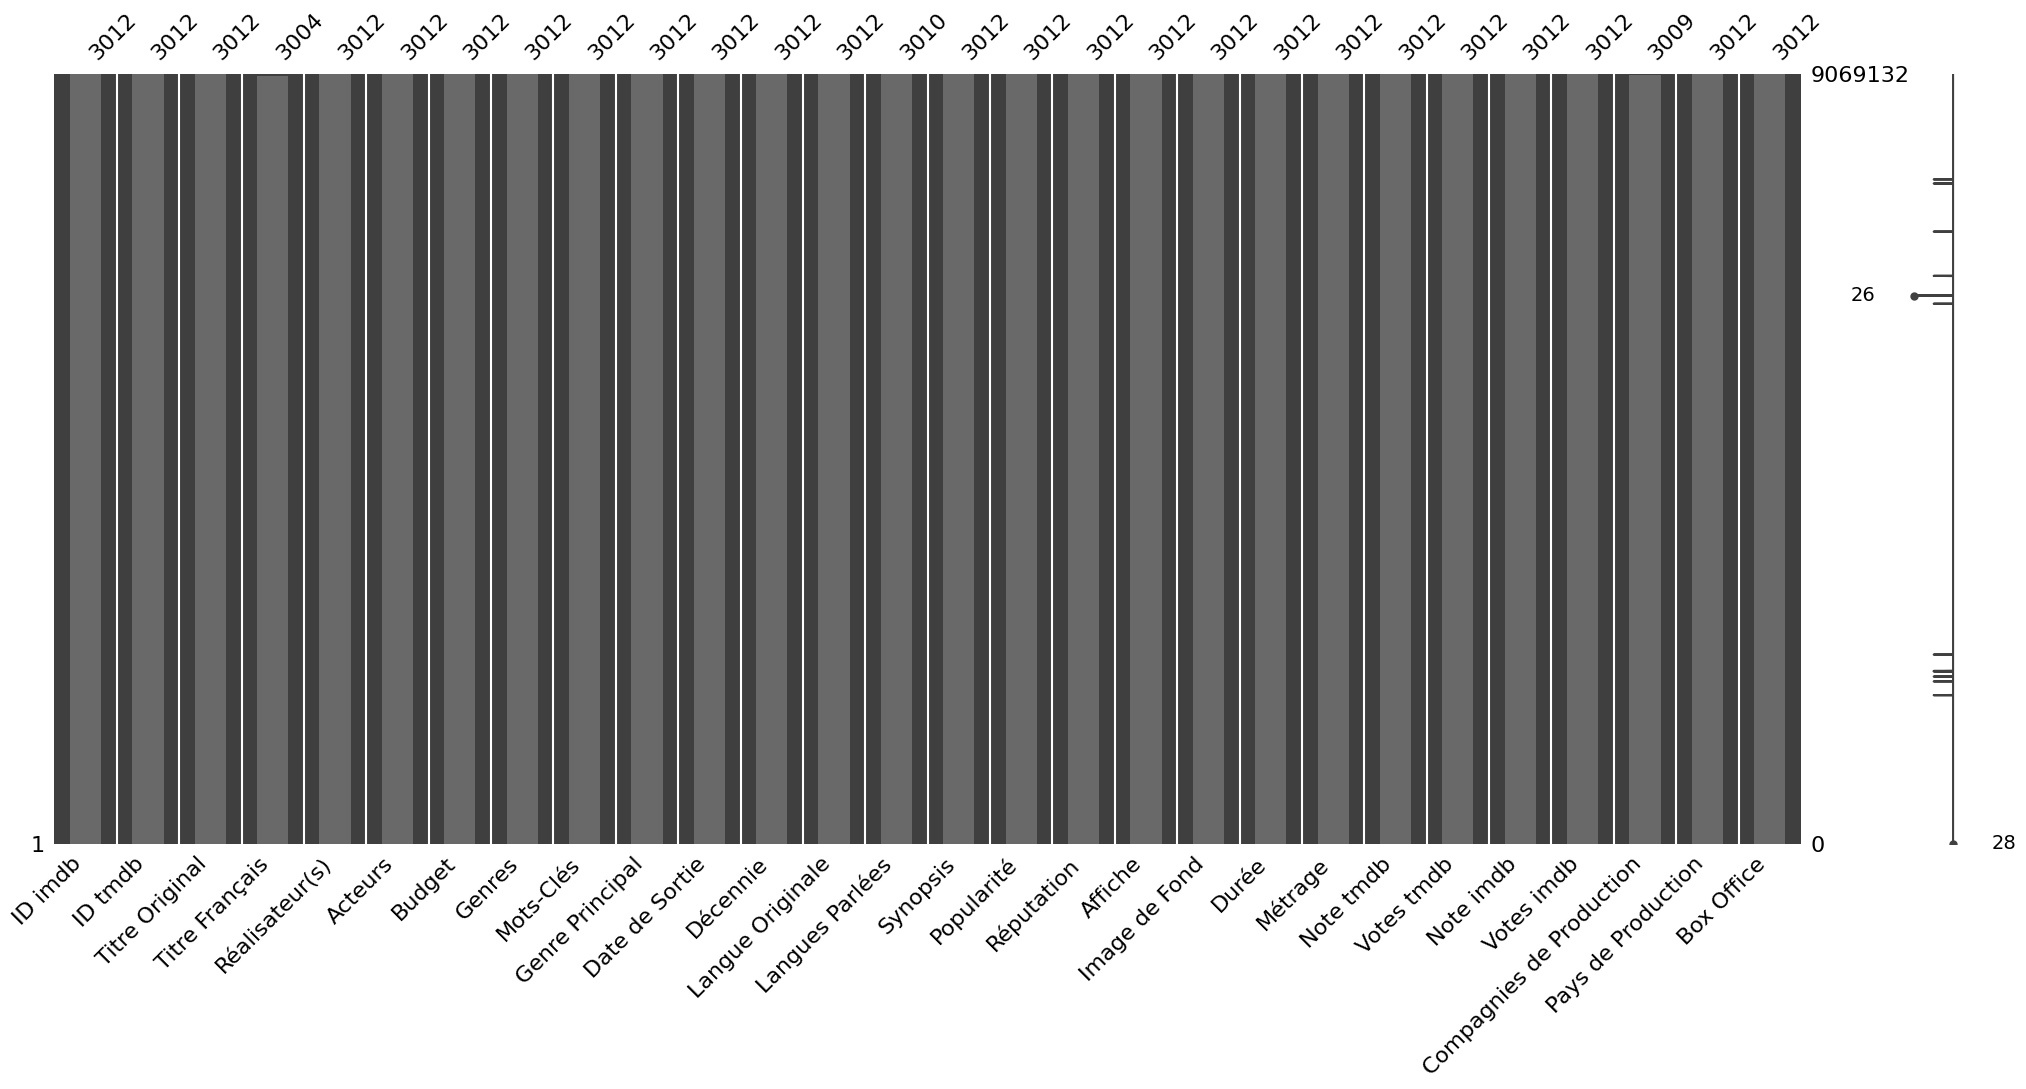

In [85]:
msno.matrix(df_movie)
msno.bar(df_movie)

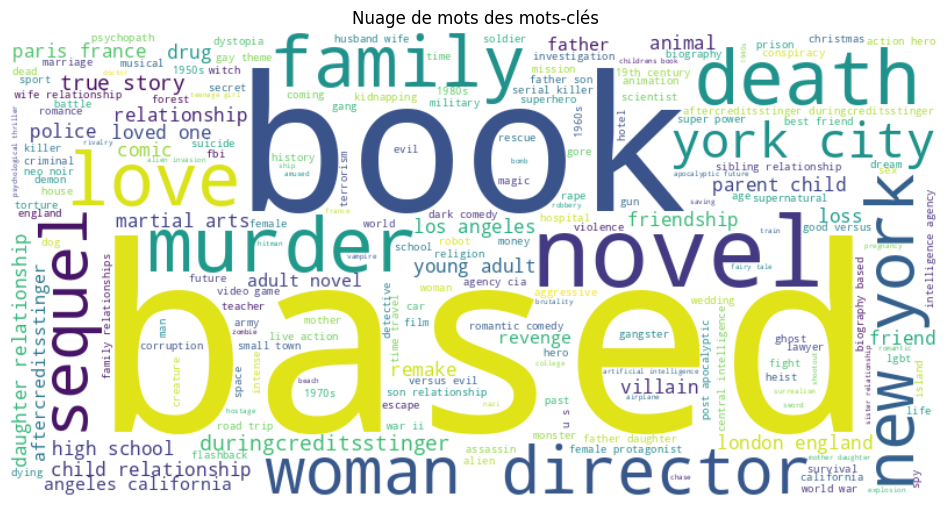

In [25]:
from wordcloud import WordCloud

# String of all words
all_words = ' '.join(df_movie['Mots-Clés'].dropna())

# Create and plot word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_words)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des mots-clés')
plt.show()

In [93]:
# Filtrer pour trouver un film spécifique
movie = df_movie[df_movie['Titre Français'].str.contains('Léon', case=False, na=False)]
movie

,ID imdb,ID tmdb,Titre Original,Titre Français,Réalisateur(s),Acteurs,Budget,Genres,Mots-Clés,Genre Principal,...,Image de Fond,Durée,Métrage,Note tmdb,Votes tmdb,Note imdb,Votes imdb,Compagnies de Production,Pays de Production,Box Office
67,tt0110413,101,Léon: The Professional,Léon,Luc Besson,"Randolph Scott,Jean Reno, Gary Oldman, Don Cr...",16000000,"Crime, Drama, Action","hotel room, new york city, immigrant, assassin...",Crime,...,/jRJrQ72VLyEnVsvwfep8Xjlvu8c.jpg,111,Moyen,8.3,13202,8.5,1278040,"Gaumont, Les Films du Dauphin","US, FR",45284974


### Nettoyage des données

In [84]:
# Permet d'enlever les doublons d'acteurs (jouant plusieurs roles dans le même film)
df_movie['Acteurs'] = df_movie['Acteurs'].fillna('').str.split(',').apply(set)
df_movie['Acteurs'] = df_movie['Acteurs'].apply(lambda x: ','.join(set(x)))

# Corrige la colonne des mots clés
df_movie['Mots-Clés'] = df_movie['Mots-Clés'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_movie['Mots-Clés'] = df_movie['Mots-Clés'].str.replace(r"['\[\]]", '', regex=True)

### Creation d'une colonne pour description pour Tfidf Vectorizer

In [4]:
# Copie du DataFrame pour les opérations de nettoyage
df_ml = df_movie.copy()

# Normalisation des colonnes textuelles
df_ml['Titre Original'] = df_ml['Titre Original'].str.strip().str.lower()
df_ml['Genres'] = df_ml['Genres'].str.strip().str.lower()
df_ml['Mots-Clés'] = df_ml['Mots-Clés'].str.strip().str.lower()
df_ml['Réalisateur(s)'] = df_ml['Réalisateur(s)'].str.strip().str.lower()
df_ml['Synopsis'] = df_ml['Synopsis'].str.strip().str.lower()
df_ml['Acteurs'] = df_ml['Acteurs'].str.strip().str.lower()

# Création de la colonne 'description' en combinant les informations
df_ml['description'] = (
    df_ml['Genres'].fillna('').astype(str) + ' | ' +
    df_ml['Mots-Clés'].fillna('').astype(str) + ' | ' +
    df_ml['Réalisateur(s)'].fillna('').astype(str) + ' | ' +
    df_ml['Synopsis'].fillna('').astype(str) + ' | ' +
    df_ml['Acteurs'].fillna('').astype(str)
)

# Vérification de la qualité de la description après la normalisation
df_ml[['description']].head()


                                         description
0  romance, fantasy, comedy | new york city, time...
1  science fiction, drama | london, england, robb...
2  drama, romance | dream, parent child relations...
3  drama, crime | based on novel or book, loss of...
4  horror | religion and supernatural, exorcism, ...


---

# **Système de recommandation**

## Fonction de Recommandation de Films :

### `recommander_films(similar_movie_title, k=10)`

- **Objectif :** Recommander des films similaires à un film donné basé sur leur distance dans l'espace des caractéristiques.
- **Arguments :**
  - `similar_movie_title` (str) : Le titre original du film pour lequel vous souhaitez des recommandations.
  - `k` (int, par défaut : 10) : Nombre de recommandations à retourner.

- **Retour :**
  - DataFrame contenant les films recommandés similaires.
  - Renvoie un message d'erreur si le film spécifié n'existe pas dans le dataset ou s'il y a une autre exception.

- **Approche :**
    1. Trouve l'index correspondant au film donné à partir de son titre.
    2. Calcule les `k` films les plus proches en utilisant la méthode NearestNeighbors.
    3. Exclut le film lui-même de la liste des recommandations.
    4. Retourne les films recommandés.

- **Exceptions :**
    - `IndexError` : Levée si le film donné n'est pas trouvé dans le dataset.
    - `Exception` : Gère toutes autres exceptions qui pourraient survenir lors de l'exécution.

### Exemple d'Utilisation :

```python
recommended_films = recommander_films("Inception", k=5)
print(recommended_films)


In [47]:
from sklearn.neighbors import NearestNeighbors

In [48]:
knn = NearestNeighbors(metric='cosine', n_neighbors=5)
knn.fit(X)

distances, indices = knn.kneighbors(X[0].reshape(1, -1), n_neighbors=10)

print("Indices des voisins les plus proches:", indices)
print("Distances:", distances)


NameError: name 'X' is not defined

In [49]:
def recommander_films(similar_movie_title, k=10):
    """
    Recommande des films sur l'évaluation d'un film donné.

    Args:
    - similar_movie_title (str): Le titre original du film de référence.
    - k (int): Nombre de recommandations à retourner.

    Returns:
    - DataFrame contenant les films recommandés.
    """
    try:
        # Trouve l'index du film correspondant au titre donné
        movie_index = df_movie[df_movie['Titre Original'] == similar_movie_title].index[0]

        # Trouve les k films les plus proches
        distances, indices = knn.kneighbors(X[movie_index].reshape(1, -1), n_neighbors=k+1)
        recommended_indices = indices[0][1:]  # Ignorer le premier qui est le film lui-même

        # Récupérer les films recommandés
        recommended_movies = df_movie.iloc[recommended_indices]
        return recommended_movies

    except IndexError:
        print(f"Erreur : Le film '{similar_movie_title}' n'existe pas dans le dataset.")
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")

In [52]:
recommended_movies = recommander_films(str(input("Nom d'un film (en anglais) : ")), k=int(input("Nombre de films recommandés : ")))

if recommended_movies is not None:
    print("Films recommandées:")

recommended_movies[["Titre Français", "Genre Principal", "Durée", "Note tmdb", "Votes tmdb", "Note imdb", "Votes imdb", "Popularité"]]

Nom d'un film (en anglais) : The Fault in Our Stars
Nombre de films recommandés : 8
Une erreur s'est produite : name 'X' is not defined


TypeError: 'NoneType' object is not subscriptable

---

## Fonction de Recommandation de Films Version 2 :

### `recommander_films_v2(movie_title, k=5)`

- **Objectif :** Recommander des films similaires à un film donné en utilisant la similarité basée sur les descriptions enrichies.

- **Arguments :**
  - `movie_title` (str) : Le titre original du film pour lequel vous souhaitez obtenir des recommandations.
  - `k` (int, par défaut : 5) : Nombre de recommandations à retourner.

- **Retour :**
  - DataFrame contenant les films recommandés, triés par similarité (distance).

- **Exceptions :**
  - `ValueError` : Levée si le film spécifié n'est pas trouvé dans la base de données.

- **Approche :**
    1. Vérifie si le film donné est présent dans la base de données.
    2. Trouve l'index correspondant au film donné.
    3. Enrichit la description de chaque film avec les genres, mots-clés, réalisateurs, synopsis et acteurs.
    4. Utilise TF-IDF Vectorizer pour transformer les descriptions en vecteurs représentatifs. Limite les dimensions à 5000 pour éviter la surcomplexité?
    5. Utilise NearestNeighbors avec la métrique 'cosine' pour calculer les films similaires.
    6. Exclut le film lui-même des recommandations.
    7. Ajoute les distances de similarité aux recommandations finales.
    8. Trie les recommandations par distance pour un classement pertinent.

### Exemple d'Utilisation :

```python
recommended_films = recommander_films_v2("Inception", k=5)
print(recommended_films)


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

def recommander_films_v2(movie_title, k=5):
    """
    Recommande des films en fonction de leur similarité avec un film donné.

    Args:
    - movie_title (str): Le titre original du film de référence.
    - k (int): Nombre de recommandations à retourner.

    Returns:
    - DataFrame contenant les films recommandés.
    """
    # Vérifie si le film donné existe dans le dataset
    if movie_title not in df_ml['Titre Original'].values:
        raise ValueError(f"Le film '{movie_title}' n'est pas dans la base de données.")

    # Trouve l'index du film correspondant au titre donné
    movie_index = df_ml[df_ml['Titre Original'] == movie_title].index[0]

    # Prétraitement avec TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    X_text = vectorizer.fit_transform(df_ml['description'])

    # Combinaison des matrices textuelles
    X_combined = X_text.tocsr()

    # Utilisation de NearestNeighbors
    knn = NearestNeighbors(n_neighbors=k+1, metric='cosine')
    knn.fit(X_combined)

    # Calcul des voisins
    distances, indices = knn.kneighbors(X_combined[movie_index], n_neighbors=k+1)
    similar_indices = indices.flatten()[1:]  # Exclure le film lui-même

    # Recommandations finales
    recommendations = df_movie.iloc[similar_indices].copy()
    recommendations['Distance'] = distances.flatten()[1:]  # Ajouter les distances

    # Trier par similarité (distance) pour un classement plus pertinent
    return recommendations.sort_values('Distance')


In [98]:
recommended_films = recommander_films_v2("the truman show", k=6)
recommended_films[['Réalisateur(s)', 'Titre Original', 'Genre Principal', 'Genres', 'Mots-Clés', 'Durée', 'Votes imdb', 'Note imdb', 'Votes tmdb', 'Note tmdb', 'Acteurs']]

,Réalisateur(s),Titre Original,Genre Principal,Genres,Mots-Clés,Durée,Votes imdb,Note imdb,Votes tmdb,Note tmdb,Acteurs
2364,Marielle Heller,A Beautiful Day in the Neighborhood,Drama,"Drama, History","friendship, male friendship, based on true sto...",109,90559,7.2,1381,7.005,"Matthew Rhys, Noah Harpster, Tom Hanks, Enrico..."
1894,Doug Ellin,Entourage,Comedy,Comedy,"friendship, alcohol, show business, nightclub,...",104,83737,6.5,901,6.219,"Jerry Ferrara, Jeremy Piven,Adrian Grenier, K..."
111,"Lana Wachowski, Lilly Wachowski",The Matrix,Action,"Action, Science Fiction","man vs machine, martial arts, dream, artificia...",136,2109232,8.7,23142,8.200,"Marcus Chong,Keanu Reeves, Laurence Fishburne..."
1150,Jeff Wadlow,Fantasy Island,Horror,"Horror, Fantasy, Adventure, Mystery","cave, private investigator, remote island, rea...",109,60478,4.9,2154,5.900,"Michael Peña, Austin Stowell, Ryan Hansen, Jim..."
14,Sidney Lumet,Network,Drama,Drama,"adultery, new york city, corruption, profit, s...",122,174711,8.1,1448,7.849,"Jordan Charney, Peter Finch, John Carpenter, ..."
1068,Garth Jennings,Son of Rambow,Comedy,Comedy,"film in film, single mother, exchange student",96,33195,7.0,393,6.738,"Bill Milner, Paul Ritter, Neil Dudgeon, Will P..."


---

## Script de Recherche de Films

### 1. Demander le film choisi par l'utilisateur
```python
film_choisi = input("Choisissez un film : ")



In [ ]:
# Demander le film choisi par l'utilisateur
film_choisi = input("Choisissez un film : ")

# Pré-traitement du titre pour correspondre correctement dans le DataFrame
film_choisi_normalize = film_choisi.lower().strip()

# Trouver le film le plus proche avec fuzzy matching
match, score = process.extractOne(film_choisi_normalize, df_ml['Titre Original'].str.lower())

# Vérifie si une correspondance suffisante a été trouvée
if score > 80:  # Ajuster le seuil selon les exigences de précision
    # Utiliser la fonction de recommandation pour le genre du film choisi
    recommended_genre = recommander_films_v2(match, k=8)

    # Vérifie si des recommandations ont été trouvées
    if recommended_genre is not None:
        print("Films recommandés :")

        # Affiche les colonnes pertinentes pour chaque recommandation
        print(recommended_genre[['Réalisateur(s)', 'Titre Original', 'Genre Principal', 'Genres', 'Mots-Clés', 'Durée', 'Votes imdb', 'Note imdb', 'Votes tmdb', 'Note tmdb']])
else:
    print(f"Le film '{film_choisi}' n'est pas dans la base de données ou la correspondance est insuffisante.")
